# Decision Trees & Perceptron(with Titanic dataset)

## Intro

## Import Libraries

In [24]:
import pandas as pd
import numpy as np
import sklearn

## Load data

In [25]:
X_train = pd.read_csv('../dataset/train.csv')
y_train = pd.read_csv('../dataset/train_labels.csv')
X_test = pd.read_csv('../dataset/test.csv')
y_test = pd.read_csv('../dataset/test_labels.csv')

In [26]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare
count,800.000000,800.000000,640.000000,800.000000,800.000000,5.890000e+02,800.000000
mean,447.867500,2.311250,29.632031,0.541250,0.387500,2.649668e+05,32.592395
std,258.858126,0.835312,14.617948,1.139044,0.811275,4.819212e+05,50.726982
min,1.000000,1.000000,0.670000,0.000000,0.000000,6.950000e+02,0.000000
25%,224.750000,2.000000,20.000000,0.000000,0.000000,2.416000e+04,7.925000
50%,449.500000,3.000000,28.000000,0.000000,0.000000,2.361710e+05,14.500000
75%,677.250000,3.000000,38.000000,1.000000,0.000000,3.477430e+05,31.275000
max,891.000000,3.000000,80.000000,8.000000,6.000000,3.101298e+06,512.329200


In [27]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,484,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134.0,9.5875,NaN,S
1,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502.0,77.9583,D7,S
2,223,3,"Green, Mr. George Henry",male,51.0,0,0,21440.0,8.0500,NaN,S
3,632,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743.0,7.0542,NaN,S
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077.0,31.3875,NaN,S


In [28]:
y_train.head()

,Survived
0,1
1,1
2,0
3,0
4,1


## Preprocessing

### Removing additional features

In [29]:
X_train = X_train.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [30]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,female,63.0,0,0,9.5875,NaN,S
1,1,female,63.0,1,0,77.9583,D7,S
2,3,male,51.0,0,0,8.0500,NaN,S
3,3,male,51.0,0,0,7.0542,NaN,S
4,3,female,38.0,1,5,31.3875,NaN,S


### Detecting missing values

In [31]:
import missingno as msno

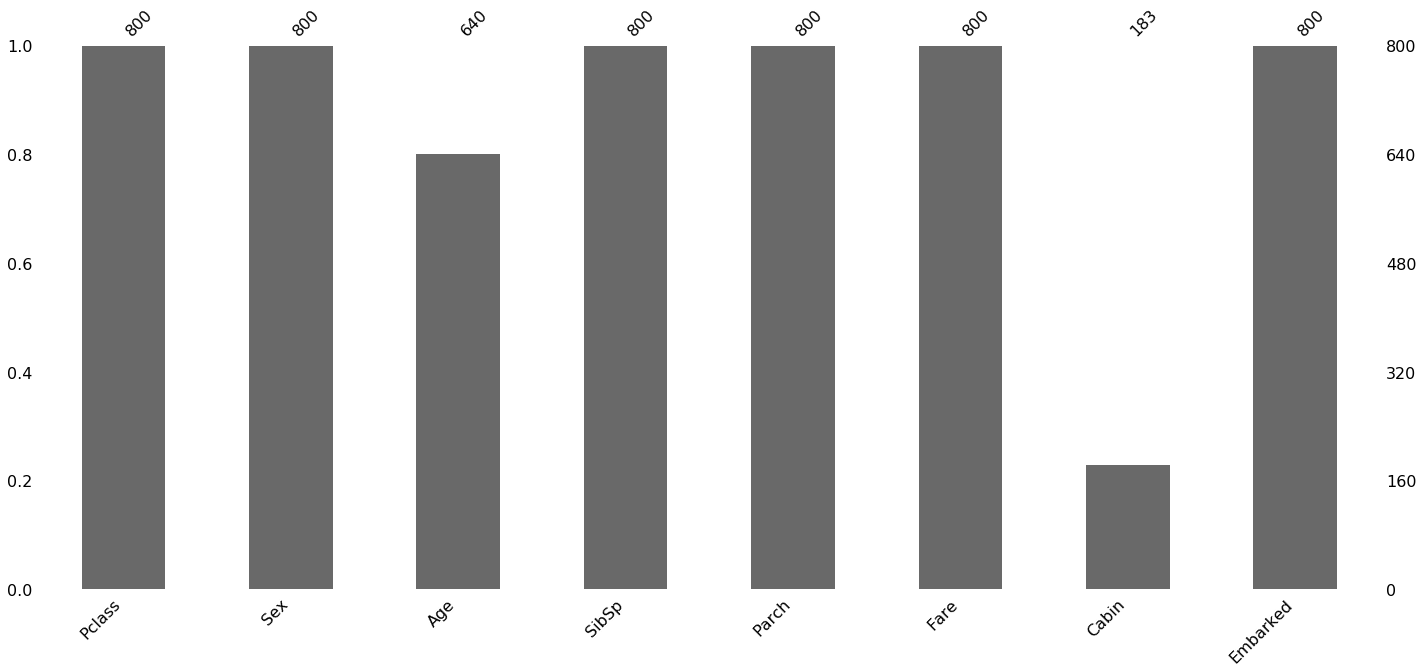

In [32]:
msno.bar(X_train)

We can see that Age and Cabin columns have missing values.

### Imputation

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train_copy = X_train.copy()
imputer = imputer.fit(X_train_copy)
X_train_copy = imputer.transform(X_train_copy)

In [35]:
df = pd.DataFrame(data=X_train_copy, columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,female,63,0,0,9.5875,B96 B98,S
1,1,female,63,1,0,77.9583,D7,S
2,3,male,51,0,0,8.05,B96 B98,S
3,3,male,51,0,0,7.0542,B96 B98,S
4,3,female,38,1,5,31.3875,B96 B98,S


### Encoding

#### Label Encoding (for Decision Tree)

In [23]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [40]:
X_train_label_encoded = X_train_copy.copy()

enc = enc.fit(X_train_copy[:,1])
X_train_label_encoded[:, 1] = enc.transform(X_train_copy[:, 1])

enc = enc.fit(X_train_copy[:,6])
X_train_label_encoded[:, 6] = enc.transform(X_train_copy[:, 6])

enc = enc.fit(X_train_copy[:,7])
X_train_label_encoded[:, 7] = enc.transform(X_train_copy[:, 7])

print(X_train_label_encoded[:5, :])

[[3 0 63.0 0 0 9.5875 40 2]
 [1 0 63.0 1 0 77.9583 102 2]
 [3 1 51.0 0 0 8.05 40 2]
 [3 1 51.0 0 0 7.0542 40 2]
 [3 0 38.0 1 5 31.3875 40 2]]


#### OneHot Encoding (for Perceptron)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
onehotencoder = OneHotEncoder(categorical_features = [1, 5, 7, 8])
X_train_encoded = onehotencoder.fit_transform(X_train_copy).toarray()
# ct = ColumnTransformer([("encoder", OneHotEncoder(), [1,7,8])], remainder='passthrough')
# X_train_copy = np.array(ct.fit_transform(X_train_copy), dtype=np.str)
print()

## 1. Decision Tree

### model

### Train

### Test

## 2. Perceptron

### model

### Train

### Test

## 3. Decision Tree + Perceptron

### model

### Train

### Test

## Conclusion

## Further Readings